# Simulating expansion qualities

In this notebook, we simulate 200 kingdoms drawn from single expansions each to assess the mean qualities we arrive at.

In [28]:
import sys
sys.path.append("..")
import numpy as np
import random_kingdominion as rk
import matplotlib.pyplot as plt


In [44]:

def simulate_mean_expansion_quals(expansions: str | list[str], n=200) -> dict[str, float]:
    """
    Set up a basic randomizer with the given expansions, draw `n` kingdoms from it and
    calculate the mean qualities.

    n=200 seems to be a good compromise given the testing I've conducted with Plunder.
    """
    config = rk.CustomConfigParser(load_default=True)
    expansions = expansions if isinstance(expansions, list) else [expansions]
    config.set_expansions(expansions)
    randomizer = rk.KingdomRandomizer(config)
    kingdoms = [randomizer.randomize_new_kingdom() for _ in range(n)]
    mean_quals = {qual: np.mean([k.total_qualities[qual] for k in kingdoms]) for qual in rk.QUALITIES_AVAILABLE}
    return mean_quals


In [35]:
mean_quals = {}
for expansion in rk.EXPANSION_LIST:
    mean_quals[expansion] = simulate_mean_expansion_quals(expansion)
    print(f"Done with {expansion}.")


Done with Plunder.
Done with Renaissance.
Done with Base, 2E.
Done with Intrigue.
Done with Cornucopia, 1E.
Done with Dark Ages.
Done with Guilds.
Done with Hinterlands.
Done with Menagerie.
Done with Intrigue, 2E.
Done with Promo.
Done with Base, 1E.
Done with Intrigue, 1E.
Done with Prosperity, 1E.
Done with Empires.
Done with Allies.
Done with Alchemy.
Done with Nocturne.
Done with Hinterlands, 2E.
Done with Hinterlands, 1E.
Done with Seaside, 1E.
Done with Prosperity, 2E.
Done with Cornucopia & Guilds, 2E.
Done with Guilds, 1E.
Done with Adventures.
Done with Base.
Done with Seaside.
Done with Seaside, 2E.
Done with Prosperity.
Done with Cornucopia.


In [45]:
mean_quals["Fully Random"] = simulate_mean_expansion_quals(rk.EXPANSION_LIST)


In [46]:
import json
sorted_mean_quals = {key: mean_quals[key] for key in sorted(mean_quals)}
sorted_mean_quals = {k: v for k, v in sorted_mean_quals.items() if sum([qual_val for qual_val in v.values()]) > 0}

with open("expansion_qualities.json", "w") as f:
    json.dump(sorted_mean_quals, f, indent=2)


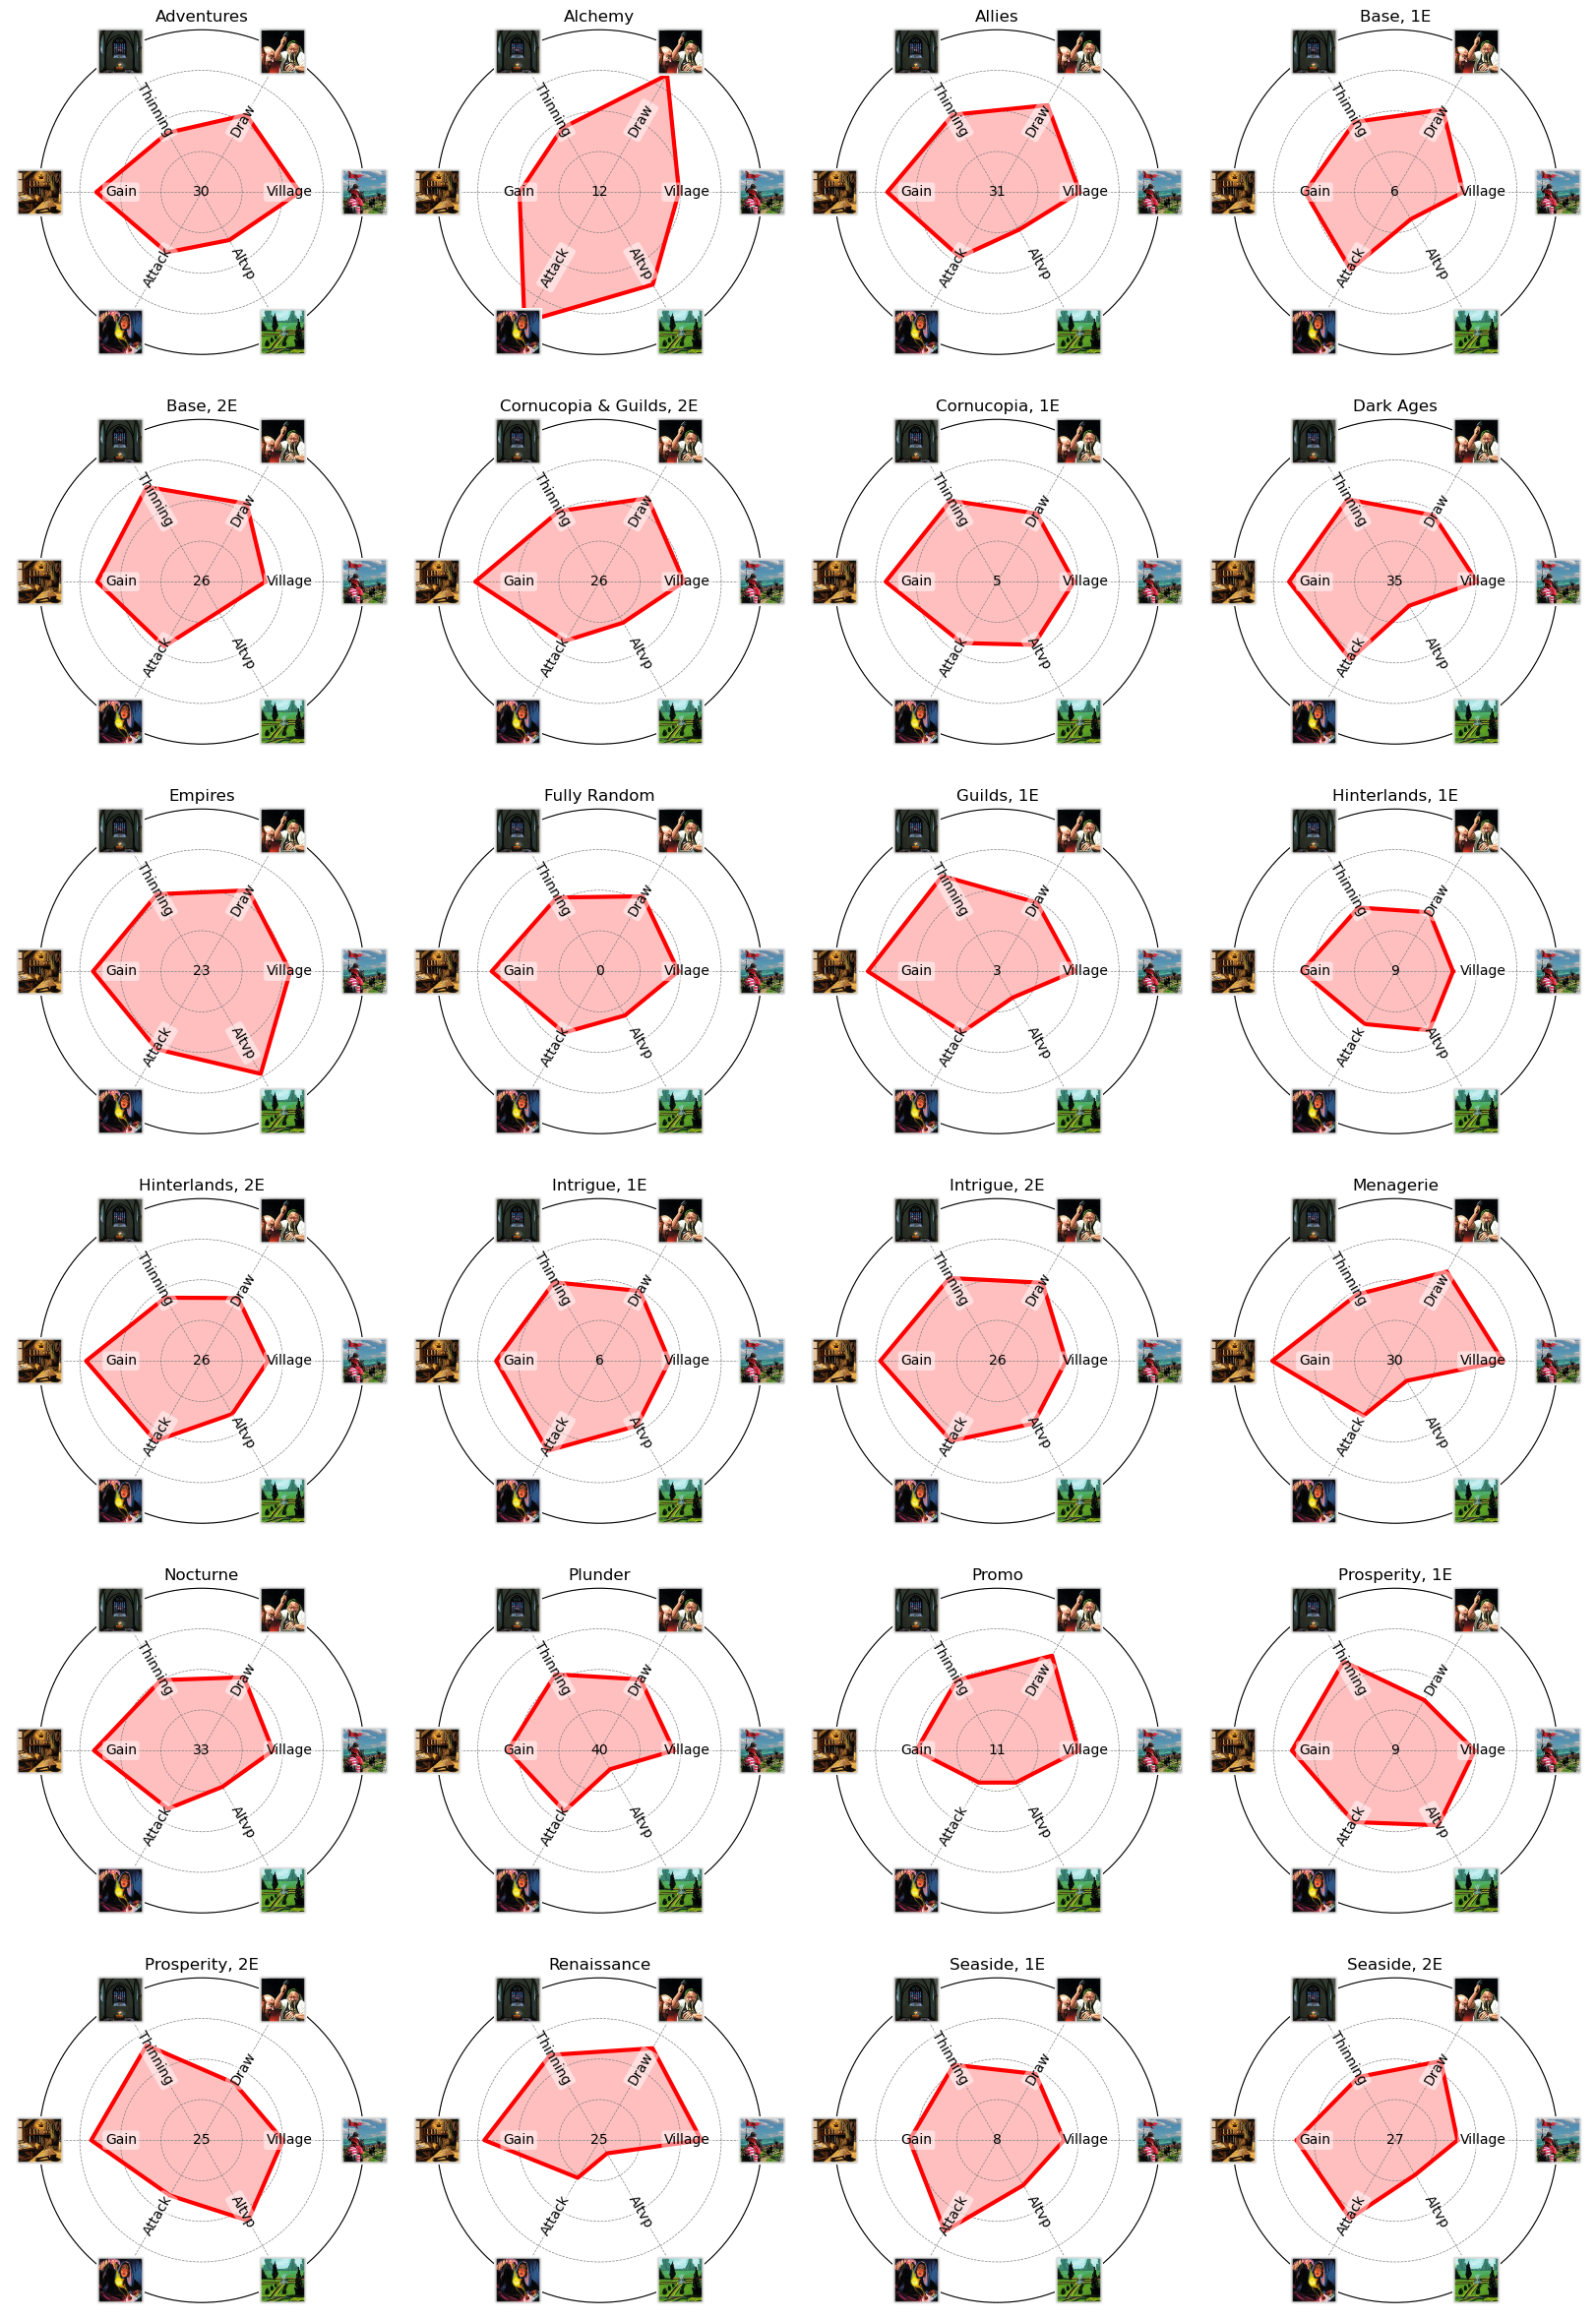

In [61]:
# Generate a plot for all the different expansions
from math import ceil
nplots = len(sorted_mean_quals)
ncols = 4
nrows = ceil(nplots/ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), subplot_kw=dict(polar=True))

for i, (expansion, qual_dict) in enumerate(sorted_mean_quals.items()):
    ax = axes.ravel()[i]
    ax.set_title(expansion)
    rk.plot_normalized_polygon(qual_dict, ax=ax)
    exp_subset = rk.ALL_CSOS[rk.ALL_CSOS["Final Expansion"] == expansion]
    exp_subset = exp_subset[exp_subset["IsInSupply"]]
    ax.text(0, 0, str(len(exp_subset)), ha="center", va="center")


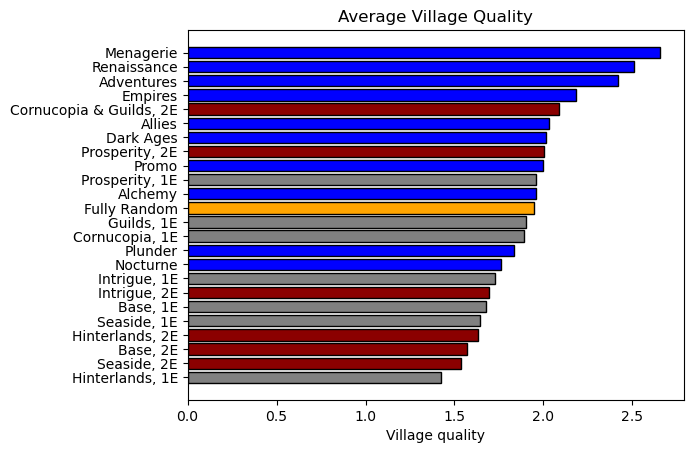

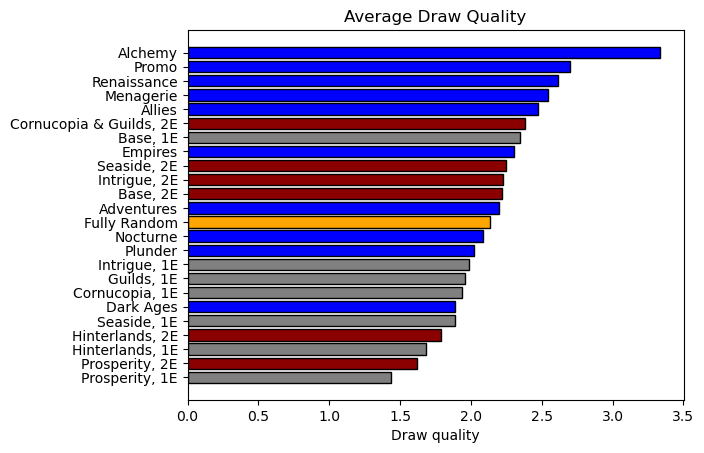

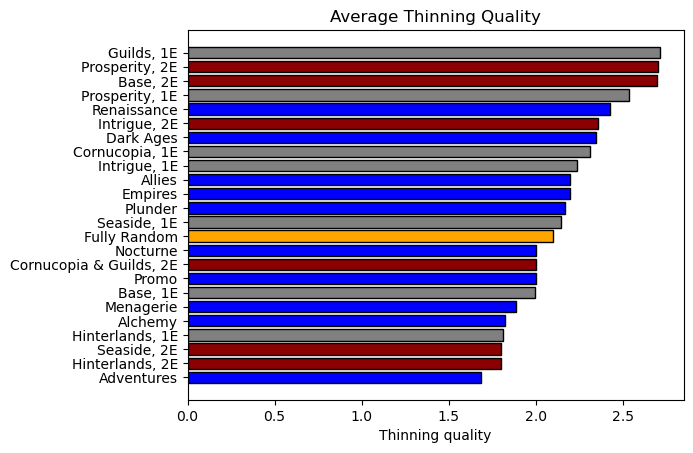

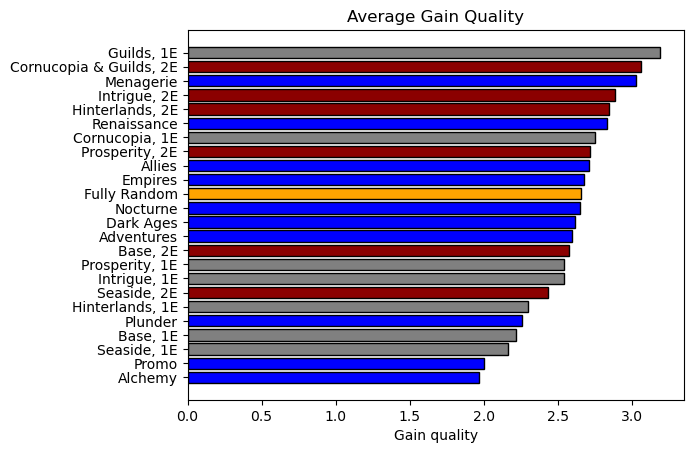

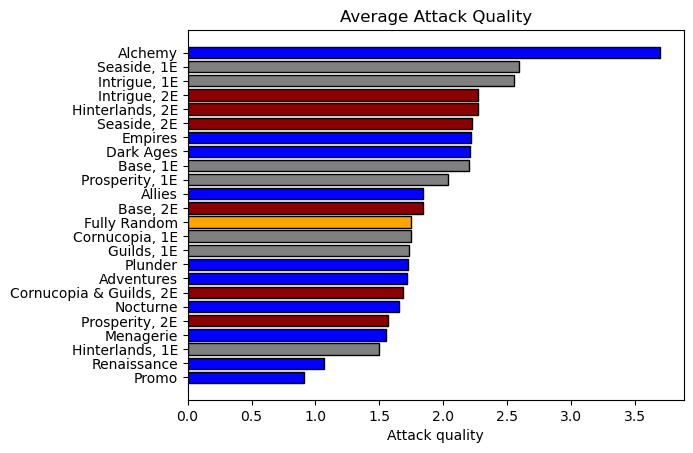

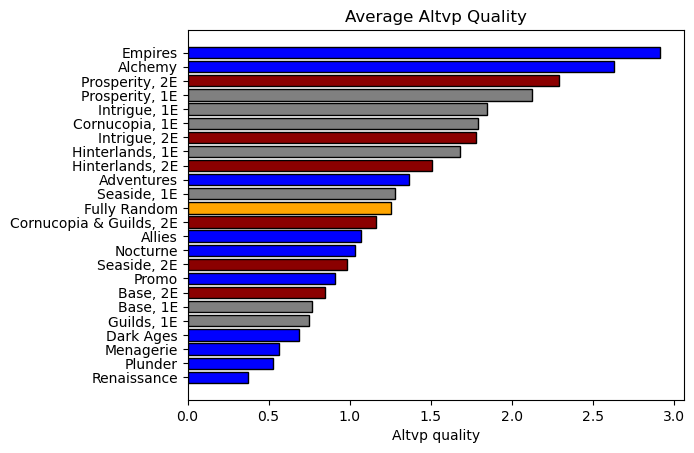

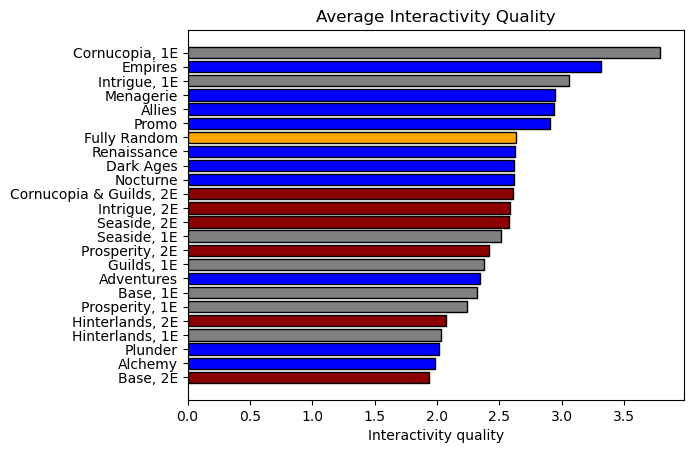

In [58]:
def get_expansion_color(exp: str) -> str:
    if exp == "Fully Random":
        return "orange"
    if "1E" in exp:
        return "gray"
    if "2E" in exp:
        return "darkred"
    return "blue"
for qual in rk.QUALITIES_AVAILABLE:
    exp_vals = {exp: vals[qual] for exp, vals in sorted_mean_quals.items()}
    exp_vals = {k: v for k, v in sorted(exp_vals.items(), key=lambda item: item[1])}
    fig, ax = plt.subplots()
    ax.set_title(f"Average {qual.capitalize()} Quality")
    colors = [get_expansion_color(exp) for exp in exp_vals]
    ax.barh(list(exp_vals.keys()), list(exp_vals.values()), ec="k", color=colors)
    ax.set_xlabel(f"{qual.capitalize()} quality")


In [48]:
random_quals = {}
for n in [100, 200, 400, 500, 1000]:
    random_quals[n] = simulate_mean_expansion_quals(rk.EXPANSION_LIST, n=n)


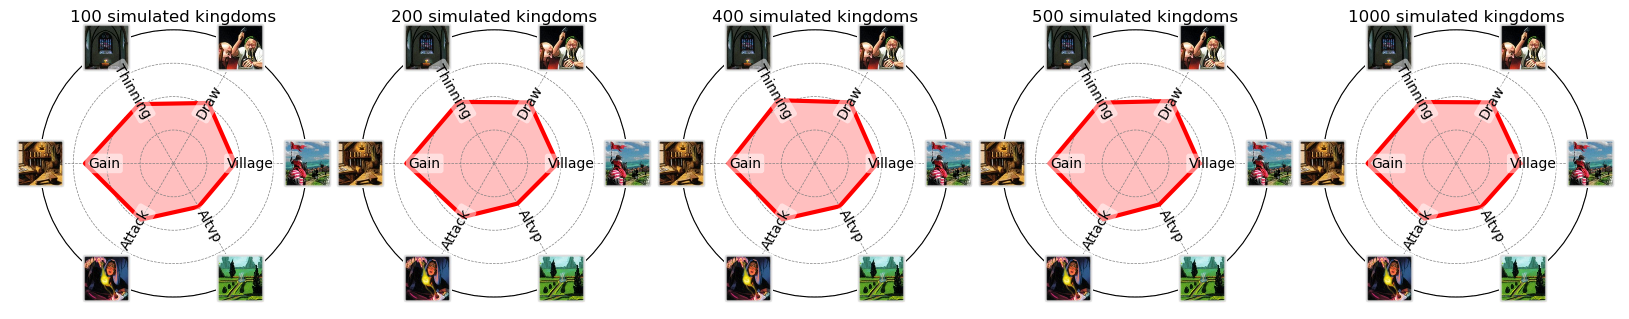

In [59]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), subplot_kw=dict(polar=True))

for i, (n, qual_dict) in enumerate(random_quals.items()):
    ax = axes[i]
    ax.set_title(f"{n} simulated kingdoms")
    rk.plot_normalized_polygon(qual_dict, ax=ax)


In [60]:
for qual in rk.QUALITIES_AVAILABLE:
    values = [d[qual] for d in random_quals.values()]
    print(f"{qual}: {np.mean(values)} +- {np.std(values)}")


village: 1.8847 +- 0.028985513623187645
draw: 2.1161 +- 0.02246864481894716
thinning: 2.1165999999999996 +- 0.043591742337282254
gain: 2.6206 +- 0.030289272028228075
attack: 1.9114 +- 0.03229612979909507
altvp: 1.4593 +- 0.045912525524087686
interactivity: 2.6137 +- 0.016666133324799794
